In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
import os
import shutil

In [18]:
def plot_audio_waveforms(input_file_path, augmented_file_path):
    """
    Plots the waveforms of the original and augmented audio files.

    Parameters:
    - input_file_path: str, path to the original audio file.
    - output_file_path: str, path to the noised audio file.
    """
    # Load the original audio file
    original_audio, sr = librosa.load(input_file_path, sr=None)
    # Load the noised audio file
    noised_audio, sr = librosa.load(output_file_path, sr=None)

    # Create subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)

    # Plot original audio
    axs[0].plot(original_audio)
    axs[0].set_title('Original Audio')
    axs[0].set_ylabel('Amplitude')

    # Plot noised audio
    axs[1].plot(noised_audio)
    axs[1].set_title('Noised Audio')
    axs[1].set_ylabel('Amplitude')
    axs[1].set_xlabel('Sample Index')

    # Display the plots
    plt.tight_layout()
    plt.show()

# **Random Noise**

In [15]:
def add_noise_to_audio(input_file_path, output_file_path, noise_level=0.05):
    audio, sample_rate = librosa.load(input_file_path, sr=None)
    noise = np.random.randn(len(audio))
    noisy_audio = audio + noise_level * noise
    sf.write(output_file_path, noisy_audio, sample_rate, format='wav')

In [16]:
# test
audio_demo_dir = "/content/drive/MyDrive/EN.553.602DataMiningSpring2024/dataset/MER_audio_taffc_dataset/Q1/MT0000040632.mp3"
output_dir = "/content/drive/MyDrive/EN.553.602DataMiningSpring2024/dataset/test"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define the output file path including the filename and extension
output_file_path = os.path.join(output_dir, "MT0000040632_noisy.wav")

# Call the function with the corrected path
add_noise_to_audio(audio_demo_dir, output_file_path)

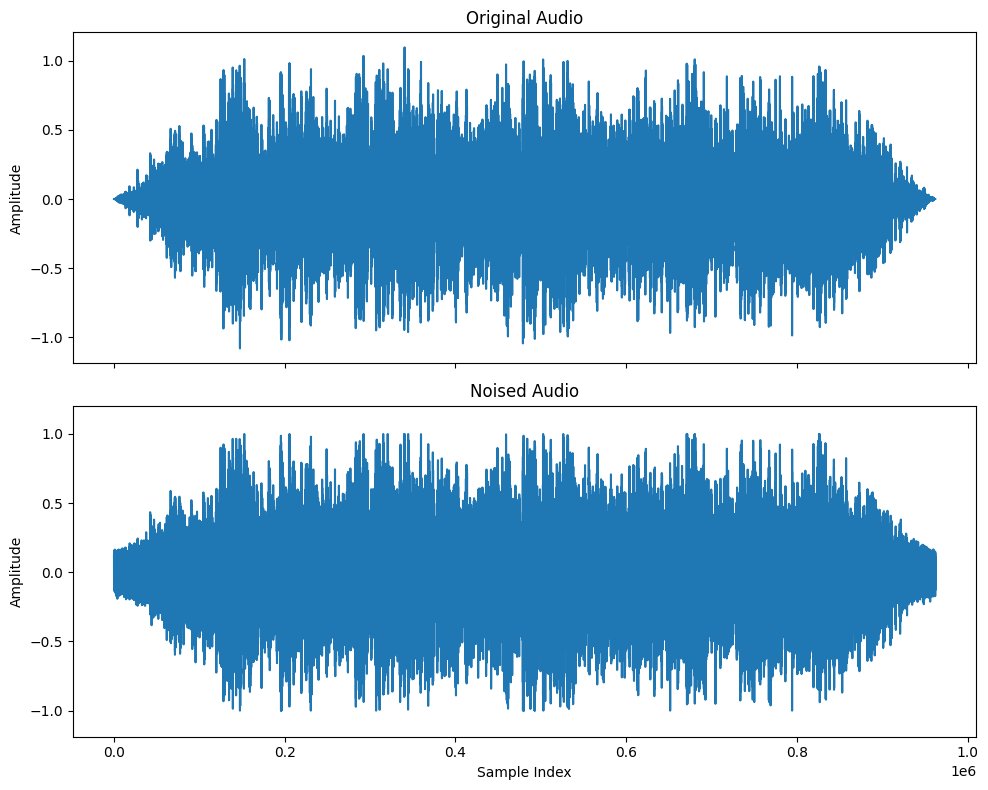

In [17]:
# Compare the .wav of original and noised audio
augmented_file_path = '/content/drive/MyDrive/EN.553.602DataMiningSpring2024/dataset/test/MT0000040632_noisy.wav'
plot_audio_waveforms(audio_demo_dir, augmented_file_path)

# **Shift time**

In [19]:
def shift_time(data, sampling_rate, shift_max, shift_direction):
    shift = np.random.randint(sampling_rate * shift_max)
    if shift_direction == 'right':
        shift = -shift
    elif shift_direction == 'both':  # Fixed from self.shift_direction
        direction = np.random.randint(0, 2)
        if direction == 1:
            shift = -shift
    augmented_data = np.roll(data, shift)
    # Set to silence for heading/tailing
    if shift > 0:
        augmented_data[:shift] = 0
    else:
        augmented_data[shift:] = 0
    return augmented_data


In [22]:
audio_demo_dir = "/content/drive/MyDrive/EN.553.602DataMiningSpring2024/dataset/MER_audio_taffc_dataset/Q1/MT0000040632.mp3"
output_dir = "/content/drive/MyDrive/EN.553.602DataMiningSpring2024/dataset/test"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load the audio file
audio, sr = librosa.load(audio_demo_dir, sr=None)
shifted_audio = shift_time(audio, sr, shift_max=2.0, shift_direction='both')

# Define output file path
output_file_path = os.path.join(output_dir, "MT0000040632_shifted.wav")  # Save as WAV to avoid MP3 encoding issues

# Save the shifted audio file
sf.write(output_file_path, shifted_audio, sr, format='wav')

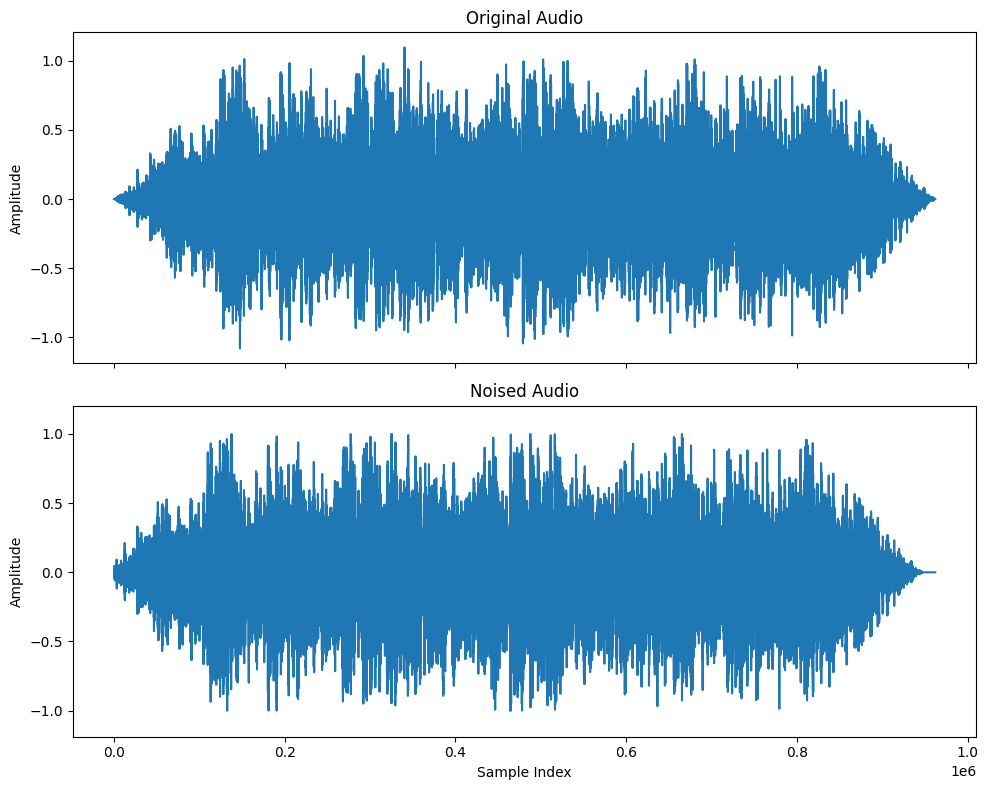

In [23]:
augmented_file_path = '/content/drive/MyDrive/EN.553.602DataMiningSpring2024/dataset/test/MT0000040632_shifted.wav'
plot_audio_waveforms(audio_demo_dir, augmented_file_path)

# **Changing Pitch**

In [28]:
def changing_pitch(data, sampling_rate, pitch_factor):
    """
    Shift the pitch of an audio signal by a number of semitones.

    Parameters:
    - data: numpy array, audio time series
    - sampling_rate: int, sampling rate of the audio
    - pitch_factor: float, number of semitones to shift the pitch
    """
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)


In [29]:
audio_demo_dir = "/content/drive/MyDrive/EN.553.602DataMiningSpring2024/dataset/MER_audio_taffc_dataset/Q1/MT0000040632.mp3"
output_dir = "/content/drive/MyDrive/EN.553.602DataMiningSpring2024/dataset/test"

audio, sr = librosa.load(audio_demo_dir, sr=None)

# Change the pitch of the audio
pitch_factor = 2.0  # Positive for higher pitch, negative for lower pitch
modified_audio = changing_pitch(audio, sr, pitch_factor)

# Define the output file path including the filename and extension
output_file_path = os.path.join(output_dir, "MT0000040632_pitch_changed.wav")

# Save the modified audio file
sf.write(output_file_path, modified_audio, sr, format='wav')

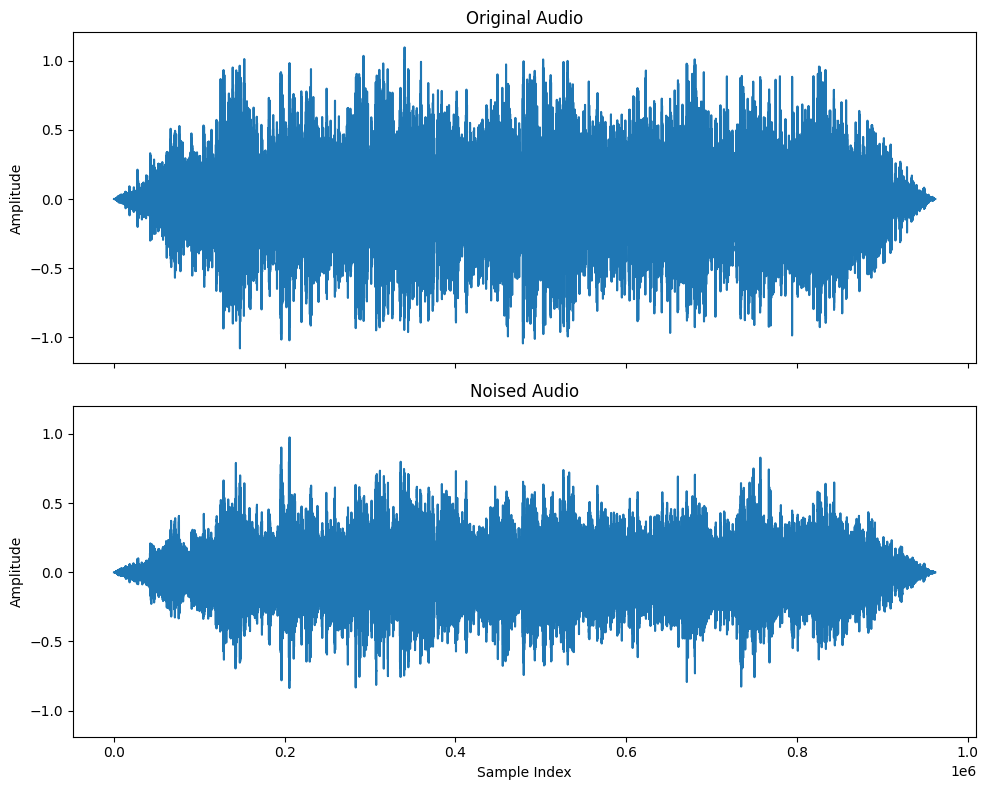

In [30]:
augmented_file_path = '/content/drive/MyDrive/EN.553.602DataMiningSpring2024/dataset/test/MT0000040632_changed.wav'
plot_audio_waveforms(audio_demo_dir, augmented_file_path)

# **Augment Q1-Q4**


In [33]:
# Save the files of Q1-Q4 to new folders for later save augmented audio together
Q1_path = '/content/drive/MyDrive/EN.553.602DataMiningSpring2024/dataset/MER_audio_taffc_dataset/Q1'
Q2_path = '/content/drive/MyDrive/EN.553.602DataMiningSpring2024/dataset/MER_audio_taffc_dataset/Q2'
Q3_path = '/content/drive/MyDrive/EN.553.602DataMiningSpring2024/dataset/MER_audio_taffc_dataset/Q3'
Q4_path = '/content/drive/MyDrive/EN.553.602DataMiningSpring2024/dataset/MER_audio_taffc_dataset/Q4'


Q1_aug_path = '/content/drive/MyDrive/EN.553.602DataMiningSpring2024/dataset/MER_audio_taffc_dataset/Q1_aug'
Q2_aug_path = '/content/drive/MyDrive/EN.553.602DataMiningSpring2024/dataset/MER_audio_taffc_dataset/Q2_aug'
Q3_aug_path = '/content/drive/MyDrive/EN.553.602DataMiningSpring2024/dataset/MER_audio_taffc_dataset/Q3_aug'
Q4_aug_path = '/content/drive/MyDrive/EN.553.602DataMiningSpring2024/dataset/MER_audio_taffc_dataset/Q4_aug'

# Create the destination directory if it doesn't exist
if not os.path.exists(Q1_aug_path):
    os.makedirs(Q1_aug_path)

if not os.path.exists(Q2_aug_path):
    os.makedirs(Q2_aug_path)

if not os.path.exists(Q3_aug_path):
    os.makedirs(Q3_aug_path)

if not os.path.exists(Q4_aug_path):
    os.makedirs(Q4_aug_path)

# Copy all files from the source directory to the destination directory
for file_name in os.listdir(Q1_path):
    # Construct full file path
    source_file = os.path.join(Q1_path, file_name)
    destination_file = os.path.join(Q1_aug_path, file_name)
    # Copy file
    shutil.copy(source_file, destination_file)


In [34]:
for file_name in os.listdir(Q2_path):
    # Construct full file path
    source_file = os.path.join(Q2_path, file_name)
    destination_file = os.path.join(Q2_aug_path, file_name)
    # Copy file
    shutil.copy(source_file, destination_file)

In [35]:
for file_name in os.listdir(Q3_path):
    # Construct full file path
    source_file = os.path.join(Q3_path, file_name)
    destination_file = os.path.join(Q3_aug_path, file_name)
    # Copy file
    shutil.copy(source_file, destination_file)

In [36]:
for file_name in os.listdir(Q4_path):
    # Construct full file path
    source_file = os.path.join(Q4_path, file_name)
    destination_file = os.path.join(Q4_aug_path, file_name)
    # Copy file
    shutil.copy(source_file, destination_file)

## **Add random noise**

In [37]:
# Augment the data
# Add noise to data
for file_name in os.listdir(Q1_aug_path):
    # Check if the file is an audio file
    if file_name.endswith('.mp3') or file_name.endswith('.wav'):
        # Construct the full file path
        input_file_path = os.path.join(Q1_aug_path, file_name)
        # Construct the output file path
        output_file_path = os.path.join(Q1_aug_path, file_name.replace('.', '_noisy.'))

        # Apply the noise function
        add_noise_to_audio(input_file_path, output_file_path, noise_level=0.05)

In [38]:
for file_name in os.listdir(Q2_aug_path):
    # Check if the file is an audio file
    if file_name.endswith('.mp3') or file_name.endswith('.wav'):
        # Construct the full file path
        input_file_path = os.path.join(Q2_aug_path, file_name)
        # Construct the output file path
        output_file_path = os.path.join(Q2_aug_path, file_name.replace('.', '_noisy.'))

        # Apply the noise function
        add_noise_to_audio(input_file_path, output_file_path, noise_level=0.05)

In [39]:
for file_name in os.listdir(Q3_aug_path):
    # Check if the file is an audio file
    if file_name.endswith('.mp3') or file_name.endswith('.wav'):
        # Construct the full file path
        input_file_path = os.path.join(Q3_aug_path, file_name)
        # Construct the output file path
        output_file_path = os.path.join(Q3_aug_path, file_name.replace('.', '_noisy.'))

        # Apply the noise function
        add_noise_to_audio(input_file_path, output_file_path, noise_level=0.05)

In [40]:
for file_name in os.listdir(Q4_aug_path):
    # Check if the file is an audio file
    if file_name.endswith('.mp3') or file_name.endswith('.wav'):
        # Construct the full file path
        input_file_path = os.path.join(Q4_aug_path, file_name)
        # Construct the output file path
        output_file_path = os.path.join(Q4_aug_path, file_name.replace('.', '_noisy.'))

        # Apply the noise function
        add_noise_to_audio(input_file_path, output_file_path, noise_level=0.05)

## **Shift time**

In [41]:
for file_name in os.listdir(Q1_aug_path):
    # Check if the file is an audio file
    if file_name.endswith('.mp3') or file_name.endswith('.wav'):
        # Construct the full file path
        input_file_path = os.path.join(Q1_aug_path, file_name)
        # Construct the output file path
        output_file_path = os.path.join(Q1_aug_path, file_name.replace('.', '_shifted.'))

        # Load the audio file
        audio, sr = librosa.load(input_file_path, sr=None)

        # Apply the time shift function
        shifted_audio = shift_time(audio, sr, shift_max=0.5, shift_direction='both')  # Modify shift_max as needed

        # Save the shifted audio file
        sf.write(output_file_path, shifted_audio, sr, format='wav')

print("Time shift applied to all files in the directory.")

Time shift applied to all files in the directory.


In [42]:
for file_name in os.listdir(Q2_aug_path):
    # Check if the file is an audio file
    if file_name.endswith('.mp3') or file_name.endswith('.wav'):
        # Construct the full file path
        input_file_path = os.path.join(Q2_aug_path, file_name)
        # Construct the output file path
        output_file_path = os.path.join(Q2_aug_path, file_name.replace('.', '_shifted.'))

        # Load the audio file
        audio, sr = librosa.load(input_file_path, sr=None)

        # Apply the time shift function
        shifted_audio = shift_time(audio, sr, shift_max=0.5, shift_direction='both')  # Modify shift_max as needed

        # Save the shifted audio file
        sf.write(output_file_path, shifted_audio, sr, format='wav')

print("Time shift applied to all files in the directory.")

Time shift applied to all files in the directory.


In [43]:
for file_name in os.listdir(Q3_aug_path):
    # Check if the file is an audio file
    if file_name.endswith('.mp3') or file_name.endswith('.wav'):
        # Construct the full file path
        input_file_path = os.path.join(Q3_aug_path, file_name)
        # Construct the output file path
        output_file_path = os.path.join(Q3_aug_path, file_name.replace('.', '_shifted.'))

        # Load the audio file
        audio, sr = librosa.load(input_file_path, sr=None)

        # Apply the time shift function
        shifted_audio = shift_time(audio, sr, shift_max=0.5, shift_direction='both')  # Modify shift_max as needed

        # Save the shifted audio file
        sf.write(output_file_path, shifted_audio, sr, format='wav')

print("Time shift applied to all files in the directory.")

Time shift applied to all files in the directory.


In [44]:
for file_name in os.listdir(Q4_aug_path):
    # Check if the file is an audio file
    if file_name.endswith('.mp3') or file_name.endswith('.wav'):
        # Construct the full file path
        input_file_path = os.path.join(Q4_aug_path, file_name)
        # Construct the output file path
        output_file_path = os.path.join(Q4_aug_path, file_name.replace('.', '_shifted.'))

        # Load the audio file
        audio, sr = librosa.load(input_file_path, sr=None)

        # Apply the time shift function
        shifted_audio = shift_time(audio, sr, shift_max=0.5, shift_direction='both')  # Modify shift_max as needed

        # Save the shifted audio file
        sf.write(output_file_path, shifted_audio, sr, format='wav')

print("Time shift applied to all files in the directory.")

Time shift applied to all files in the directory.


## **Changing Pitch**

In [45]:
for file_name in os.listdir(Q1_aug_path):
    # Check if the file is an audio file
    if file_name.endswith('.mp3') or file_name.endswith('.wav'):
        # Construct the full file path
        input_file_path = os.path.join(Q1_aug_path, file_name)
        # Construct the output file path
        output_file_path = os.path.join(Q1_aug_path, file_name.replace('.', '_pitch_changed.'))

        # Load the audio file
        audio, sr = librosa.load(input_file_path, sr=None)

        # Apply the pitch change function
        pitch_factor = 2.0  # Change this as needed to increase or decrease pitch
        modified_audio = changing_pitch(audio, sr, pitch_factor)

        # Save the modified audio file
        sf.write(output_file_path, modified_audio, sr, format='wav')

print("Pitch changed for all files in the directory.")


Pitch changed for all files in the directory.


In [46]:
for file_name in os.listdir(Q2_aug_path):
    # Check if the file is an audio file
    if file_name.endswith('.mp3') or file_name.endswith('.wav'):
        # Construct the full file path
        input_file_path = os.path.join(Q2_aug_path, file_name)
        # Construct the output file path
        output_file_path = os.path.join(Q2_aug_path, file_name.replace('.', '_pitch_changed.'))

        # Load the audio file
        audio, sr = librosa.load(input_file_path, sr=None)

        # Apply the pitch change function
        pitch_factor = 2.0  # Change this as needed to increase or decrease pitch
        modified_audio = changing_pitch(audio, sr, pitch_factor)

        # Save the modified audio file
        sf.write(output_file_path, modified_audio, sr, format='wav')

print("Pitch changed for all files in the directory.")

Pitch changed for all files in the directory.


In [47]:
for file_name in os.listdir(Q3_aug_path):
    # Check if the file is an audio file
    if file_name.endswith('.mp3') or file_name.endswith('.wav'):
        # Construct the full file path
        input_file_path = os.path.join(Q3_aug_path, file_name)
        # Construct the output file path
        output_file_path = os.path.join(Q3_aug_path, file_name.replace('.', '_pitch_changed.'))

        # Load the audio file
        audio, sr = librosa.load(input_file_path, sr=None)

        # Apply the pitch change function
        pitch_factor = 2.0  # Change this as needed to increase or decrease pitch
        modified_audio = changing_pitch(audio, sr, pitch_factor)

        # Save the modified audio file
        sf.write(output_file_path, modified_audio, sr, format='wav')

print("Pitch changed for all files in the directory.")

Pitch changed for all files in the directory.


In [48]:
for file_name in os.listdir(Q4_aug_path):
    # Check if the file is an audio file
    if file_name.endswith('.mp3') or file_name.endswith('.wav'):
        # Construct the full file path
        input_file_path = os.path.join(Q4_aug_path, file_name)
        # Construct the output file path
        output_file_path = os.path.join(Q4_aug_path, file_name.replace('.', '_pitch_changed.'))

        # Load the audio file
        audio, sr = librosa.load(input_file_path, sr=None)

        # Apply the pitch change function
        pitch_factor = 2.0  # Change this as needed to increase or decrease pitch
        modified_audio = changing_pitch(audio, sr, pitch_factor)

        # Save the modified audio file
        sf.write(output_file_path, modified_audio, sr, format='wav')

print("Pitch changed for all files in the directory.")

Pitch changed for all files in the directory.
